<h2>Stock Market Analysis for Magnificent 7 + TSM<h2>

In this project, we will discover: 
1. What was the change of stock prices from 2014 to 2024?
2. What was the moving average for different stocks? (5, 50, 120 days)
3. What are the anticipated returns and risks associated with each stock per share?  
4. Predict the stock price using LSTM method.

In [14]:
# Import the library we need
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import DataReader
from yahoofinancials import YahooFinancials
import torch
import torch.nn as nn
import math



<h2>1. What was the change of stock prices from 2014 to 2024?<h2>

We want to implement the data from Yahoo Finance. Take Apple as an example to see how it performed from 2014 to 2024.

In [15]:
# Define the list of tech tickers
tech_list = ['MSFT', 'AMZN', 'META', 'AAPL', 'GOOGL', 'NVDA', 'TSLA', 'TSM']

ticker_dfs = {}

# Loop through each ticker
for ticker in tech_list:
    # Fetch historical data for the current ticker from 2018-01-01 to 2023-12-31
    yahoo_financials = YahooFinancials(ticker)
    data = yahoo_financials.get_historical_price_data(start_date='2014-01-01', 
                                                      end_date='2023-12-31', 
                                                      time_interval='daily')
    df = pd.DataFrame(data[ticker]['prices'])
    df = df.drop('date', axis=1).rename(columns={'formatted_date':'Date'}).set_index('Date')
    
    ticker_dfs[ticker] = df

AAPL_df = ticker_dfs['AAPL']
AAPL_df

,high,low,open,close,volume,adjclose
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800,17.296658
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600,16.916719
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800,17.008968
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200,16.887325
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600,16.994270
...,...,...,...,...,...,...
2023-12-22,195.410004,192.970001,195.179993,193.600006,37122800,193.353287
2023-12-26,193.889999,192.830002,193.610001,193.050003,28919300,192.803986
2023-12-27,193.500000,191.089996,192.490005,193.149994,48087700,192.903839


How does the Apple's stock price changed during 2014 to 2024.

Text(0.5, 1.0, 'Close Price History')

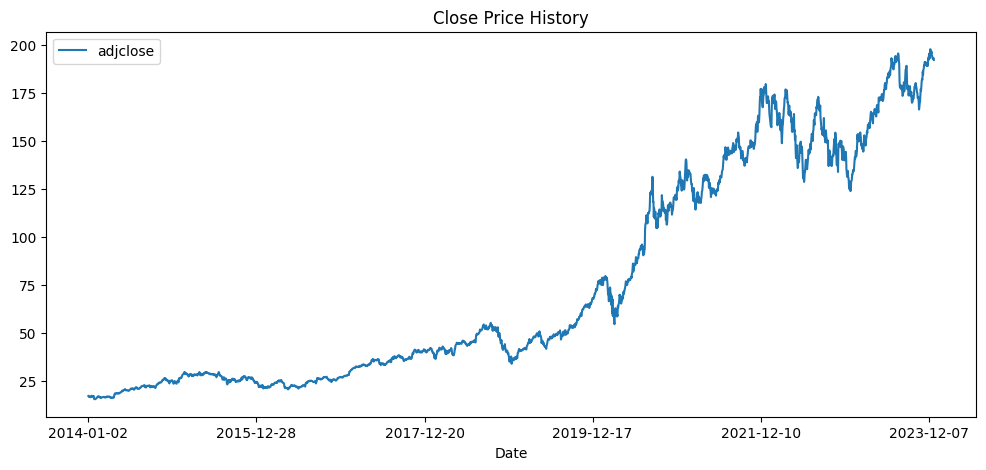

In [16]:
AAPL_df['adjclose'].plot(legend = True, figsize = (12, 5))
plt.title('Close Price History')

Now we can put all the stock price together to see how the price changed during 2014 to 2024.

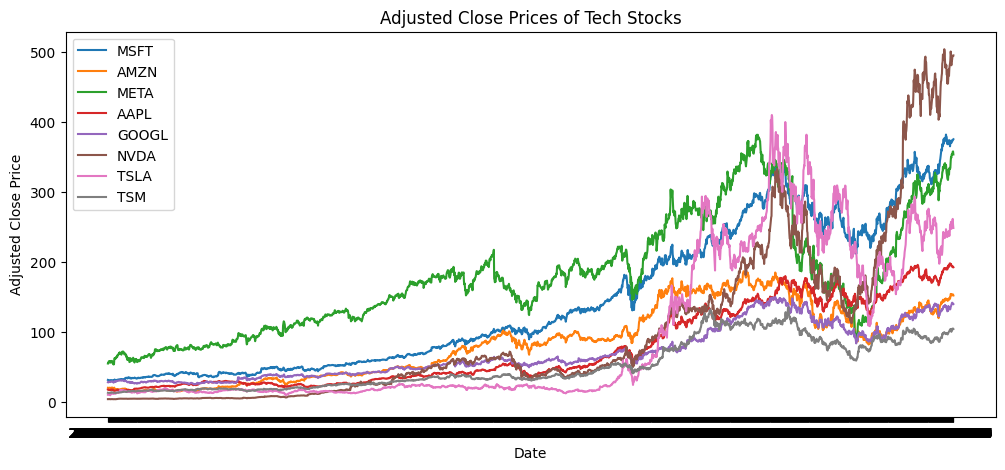

In [17]:
plt.figure(figsize=(12, 5)) 
for ticker in tech_list:
    # Plot the adjusted close price for the current ticker
    ticker_df = ticker_dfs[ticker]
    plt.plot(ticker_df.index, ticker_df['adjclose'], label=ticker)

plt.title('Adjusted Close Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

Take AAPL as example to see the moving average of the stocks over 5, 50, and 120 days of period of time. 

<h2>2. What was the moving average for different stocks?<h2>

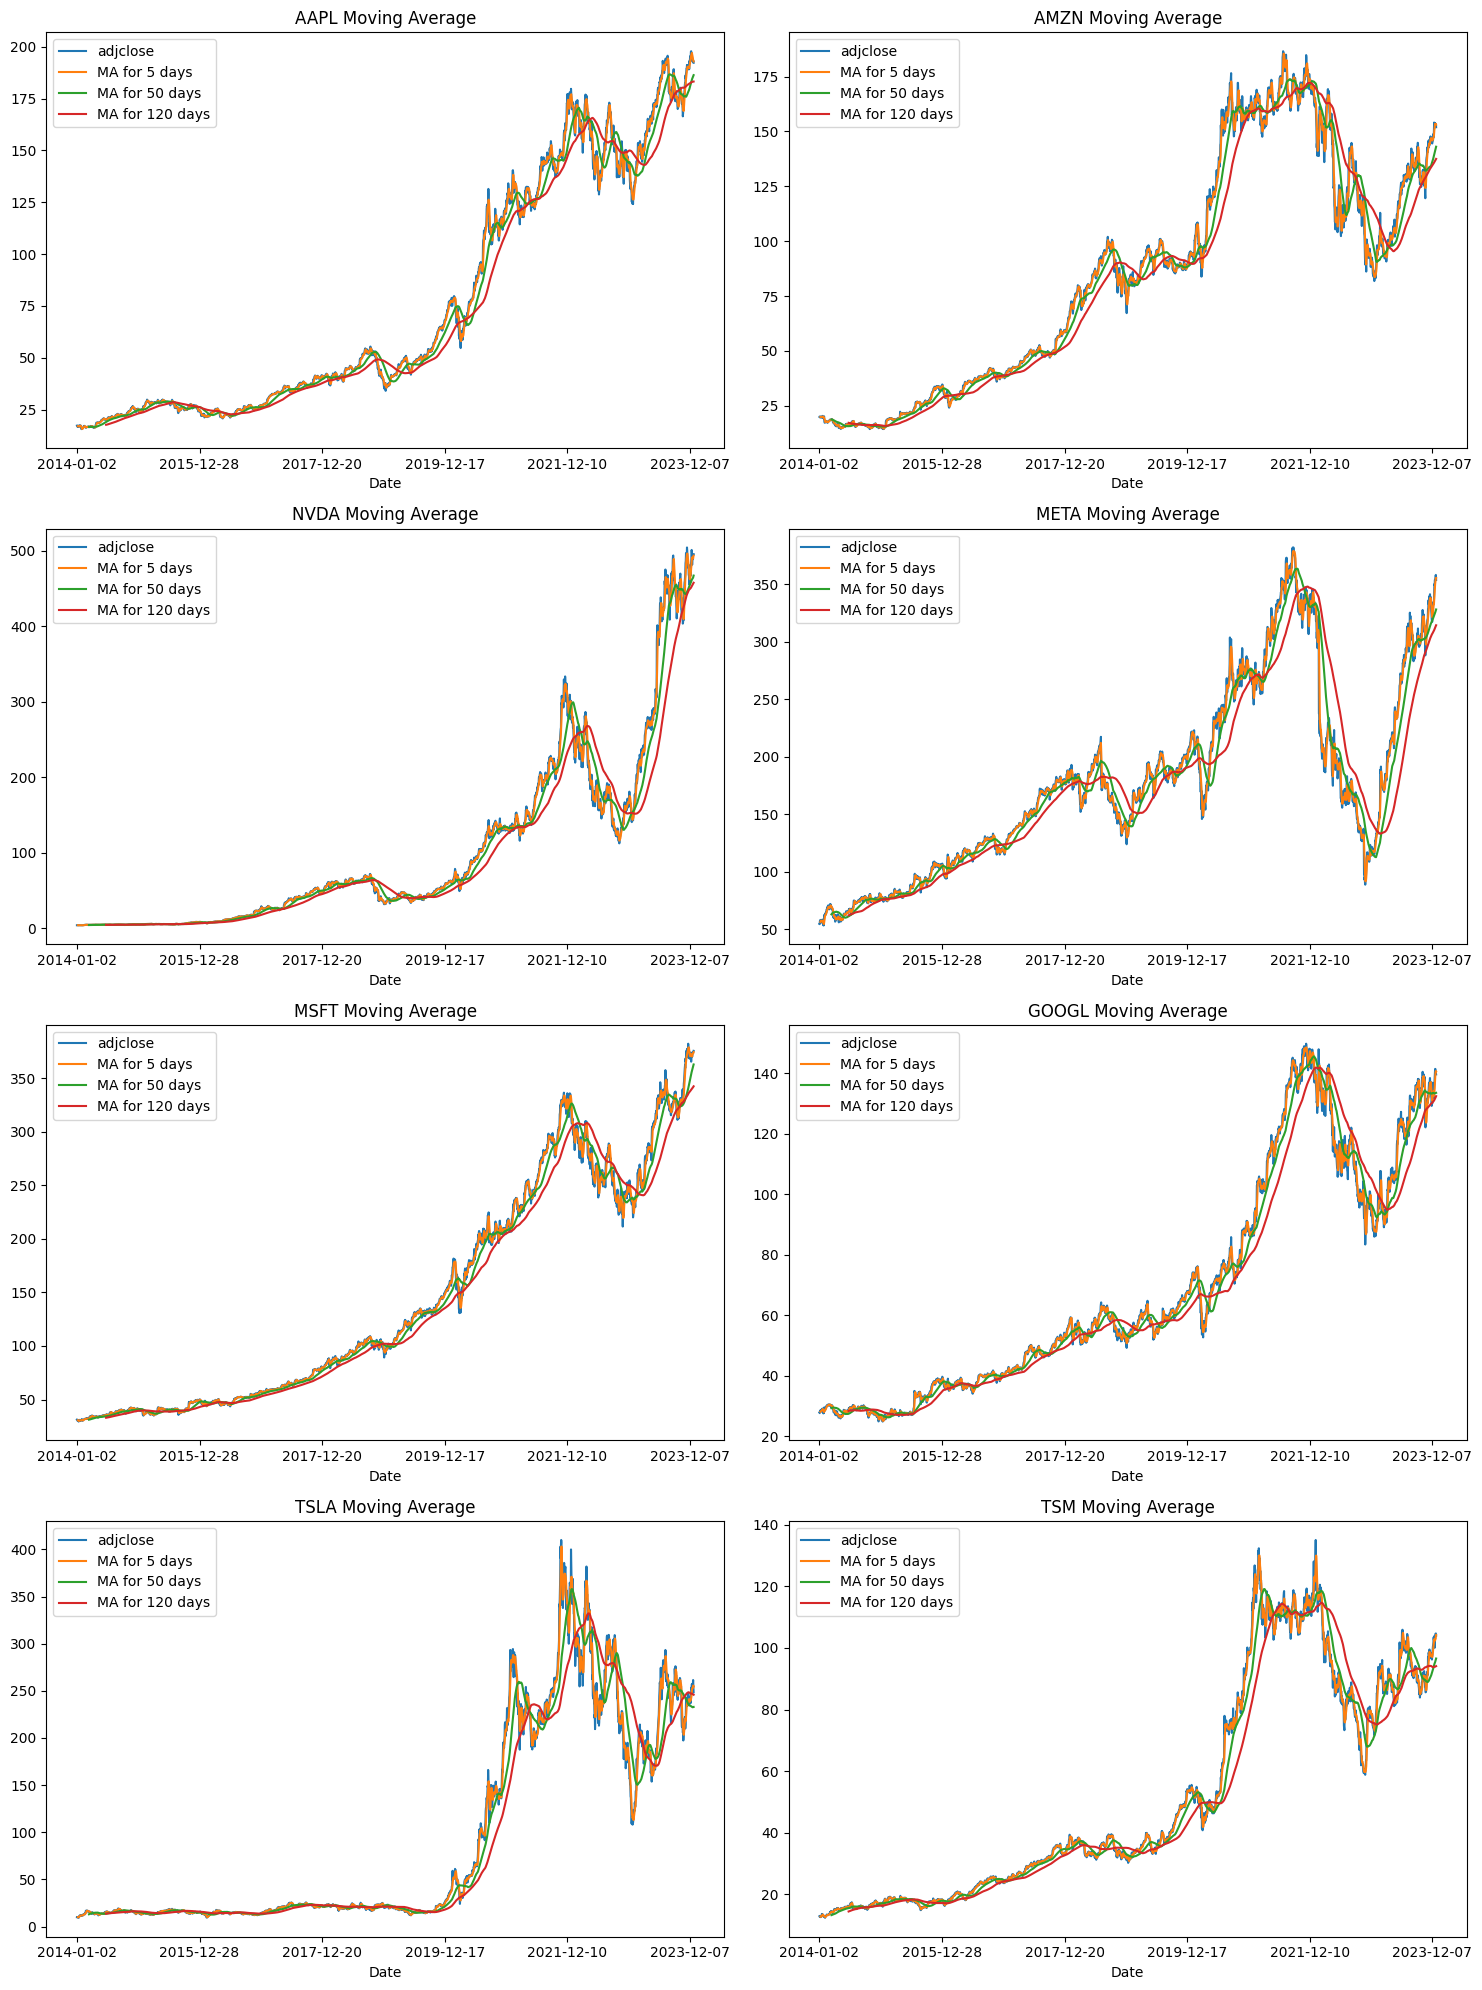

In [18]:
AAPL_df = ticker_dfs['AAPL']
AMZN_df = ticker_dfs['AMZN']
NVDA_df = ticker_dfs['NVDA']
META_df = ticker_dfs['META']
MSFT_df = ticker_dfs['MSFT']
GOOGL_df = ticker_dfs['GOOGL']
TSLA_df = ticker_dfs['TSLA']
TSM_df = ticker_dfs['TSM']

# Calculate moving averages for AAPL
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL_df[column_name] = AAPL_df['adjclose'].rolling(window=ma, center=False).mean()

# AMZN
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AMZN_df[column_name] = AMZN_df['adjclose'].rolling(window=ma, center=False).mean()

# NVDA
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    NVDA_df[column_name] = NVDA_df['adjclose'].rolling(window=ma, center=False).mean()

# META
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    META_df[column_name] = META_df['adjclose'].rolling(window=ma, center=False).mean()

# MSFT
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    MSFT_df[column_name] = MSFT_df['adjclose'].rolling(window=ma, center=False).mean()

# GOOGL
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOGL_df[column_name] = GOOGL_df['adjclose'].rolling(window=ma, center=False).mean()

# TSLA
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    TSLA_df[column_name] = TSLA_df['adjclose'].rolling(window=ma, center=False).mean()

# TSM
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    TSM_df[column_name] = TSM_df['adjclose'].rolling(window=ma, center=False).mean()


# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot moving averages
AAPL_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[0, 0], title='AAPL Moving Average')

AMZN_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[0, 1], title='AMZN Moving Average')

NVDA_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[1, 0], title='NVDA Moving Average')

META_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[1, 1], title='META Moving Average')

MSFT_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[2, 0], title='MSFT Moving Average')

GOOGL_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[2, 1], title='GOOGL Moving Average')

TSLA_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[3, 0], title='TSLA Moving Average')

TSM_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[3, 1], title='TSM Moving Average')

plt.tight_layout()

plt.show()


The greater the number of moving average days, the smoother the trend line will becomes. It's evident that the AAPL stock price experienced continuous growth until May 2022, followed by a decline until February 2023.

<h2>3. What are the anticipated returns and risks associated with each stock per share? <h2>

All the stocks we listed are all good company, but which one will bring us the highest expected return with the loest risk? And how much value do we put at risk by investing those stock? 

In [19]:
adjclose_df = pd.DataFrame()

for ticker in tech_list:
    adjclose_df[ticker] = ticker_dfs[ticker]['adjclose']


rets = adjclose_df.pct_change()
rets = rets.dropna()
rets

,MSFT,AMZN,META,AAPL,GOOGL,NVDA,TSLA,TSM
Date,,,,,,,,
2014-01-03,-0.006727,-0.003845,-0.002742,-0.021966,-0.007295,-0.011980,-0.003598,-0.011662
2014-01-06,-0.021132,-0.007088,0.048387,0.005453,0.011149,0.013401,-0.017117,-0.002950
2014-01-07,0.007749,0.011178,0.012587,-0.007152,0.019278,0.016373,0.016054,0.000592
2014-01-08,-0.017852,0.009773,0.005352,0.006333,0.002081,0.013630,0.012855,0.010645
2014-01-09,-0.006432,-0.002264,-0.017345,-0.012771,-0.009630,-0.037286,-0.024788,-0.019309
...,...,...,...,...,...,...,...,...
2023-12-22,0.002784,-0.002730,-0.001977,-0.005547,0.007620,-0.003266,-0.007701,0.005851
2023-12-26,0.000214,-0.000065,0.004075,-0.002841,0.000212,0.009195,0.016116,0.012603
2023-12-27,-0.001575,-0.000456,0.008455,0.000518,-0.008126,0.002800,0.018822,0.001915


MSFT     0.066520
AMZN     0.049113
META     0.043450
AAPL     0.062531
GOOGL    0.045274
NVDA     0.081009
TSLA     0.053926
TSM      0.053251
dtype: float64


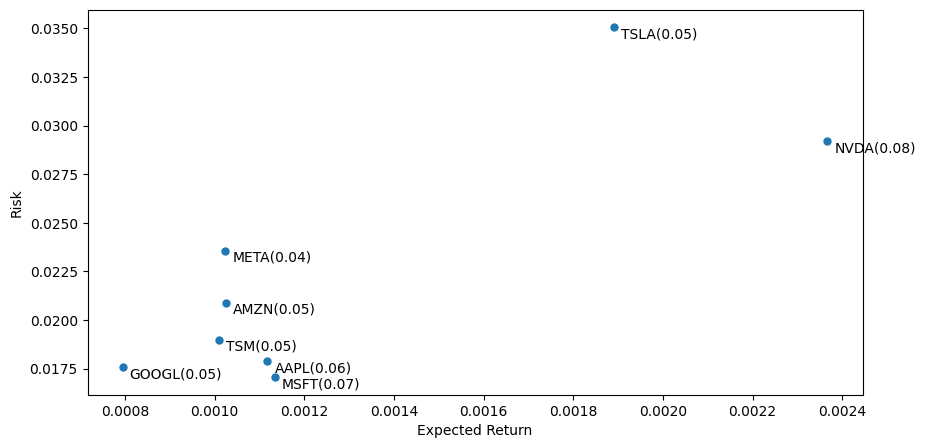

In [20]:
plt.figure(figsize=(10, 5))

# Calculate expected return over risk
expected_return_over_risk = rets.mean() / rets.std()
print(expected_return_over_risk)
plt.scatter(rets.mean(), rets.std(), s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y, ratio in zip(rets.columns, rets.mean(), rets.std(), expected_return_over_risk):
    plt.annotate(
        f'{label}({ratio:.2f})',  # Include the ratio in the annotation text
        xy=(x, y),
        xytext=(5, -5),  # Adjust the position of the text relative to the point
        textcoords='offset points',
        ha='left',  # Align text to the left of the point
        va='center')  # Align text vertically centered with the point

plt.show()


For individuals who are pursuing stability and safety, investing in stocks with lower risk and moderate expected returns would be advisable. In this case, consider stocks like META as it has the lowest risk among all listed. For those willing to take on more risk for potentially higher returns, TSLA or NVDA could be their best choices as these stocks have the highest expected return at a higher level of risk.

<h2>4. Predict the closing price stock price using LSTM.</h2>

Take AAPL as example to predict the future stock price. 

In [30]:
AAPL_df = ticker_dfs['AAPL']
AAPL_adjclose = AAPL_df[['adjclose']]

AAPL_adjclose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   adjclose  2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3+ KB


In [31]:
AAPL_adjclose = AAPL_adjclose.fillna(method = 'ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))
AAPL_df['adjclose'] = scaler.fit_transform(AAPL_df['adjclose'].values.reshape(-1, 1))
AAPL_adjclose

C:\Users\54088\AppData\Local\Temp\ipykernel_9488\344045000.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AAPL_adjclose = AAPL_adjclose.fillna(method = 'ffill')


,adjclose
Date,
2014-01-02,-0.981690
2014-01-03,-0.985860
2014-01-06,-0.984848
2014-01-07,-0.986183
2014-01-08,-0.985009
...,...
2023-12-22,0.950565
2023-12-26,0.944536
2023-12-27,0.945632


In [32]:
# function to create train, test data given stock data and sequence length
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data)
    test_set_size = int(np.round(0.1*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(AAPL_adjclose, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2210, 59, 1)
y_train.shape =  (2210, 1)
x_test.shape =  (246, 59, 1)
y_test.shape =  (246, 1)


In [33]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

y_train.size(),x_train.size()

(torch.Size([2210, 1]), torch.Size([2210, 59, 1]))

In [34]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [35]:
num_epochs = 100
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.02318551018834114
Epoch  20 MSE:  0.012945962138473988
Epoch  30 MSE:  0.004820282571017742
Epoch  40 MSE:  0.0015736619243398309
Epoch  50 MSE:  0.0010259384289383888
Epoch  60 MSE:  0.0008789216517470777
Epoch  70 MSE:  0.0007476313621737063
Epoch  80 MSE:  0.0007162142428569496
Epoch  90 MSE:  0.0006956805009394884


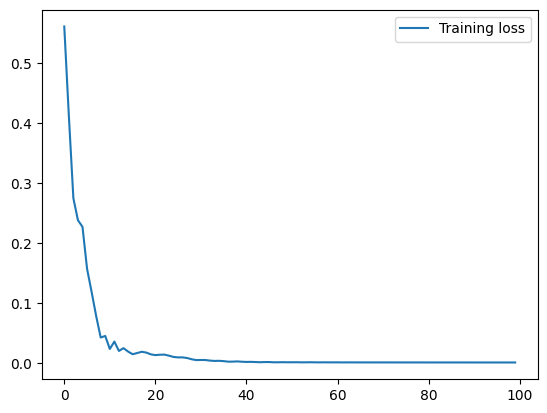

In [36]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [37]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.06 RMSE


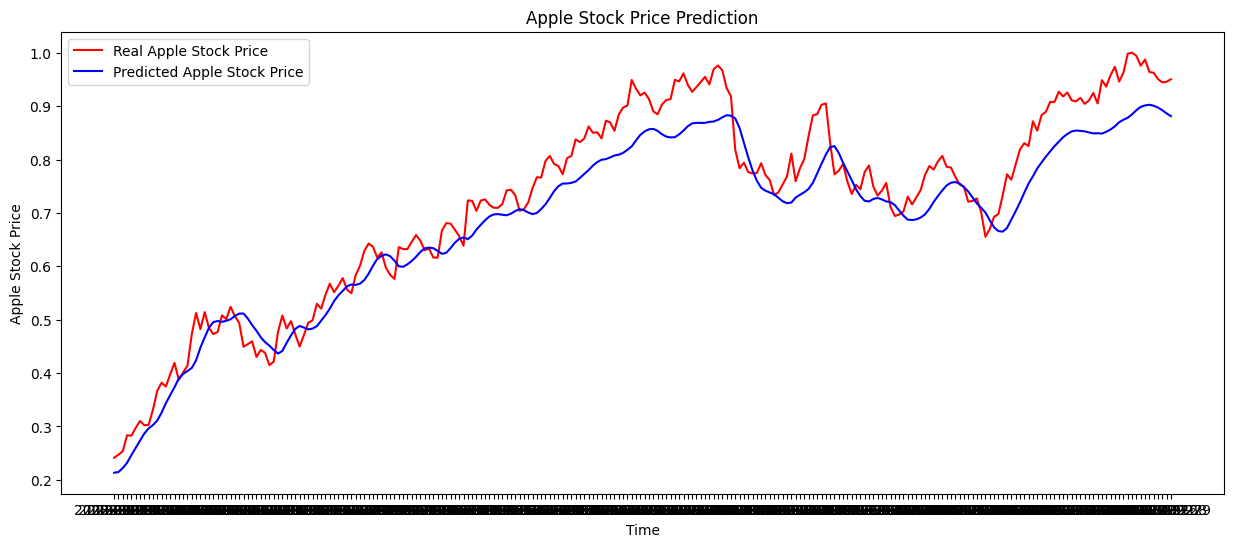

In [38]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(AAPL_adjclose[len(AAPL_adjclose)-len(y_test):].index, y_test, color = 'red', label = 'Real Apple Stock Price')
axes.plot(AAPL_adjclose[len(AAPL_adjclose)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.savefig('Apple_pred.png')
plt.show()